# Secci√≥n 1: Importar Librer√≠as y Configuracion




In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

tf.random.set_seed(42)
print(f"üî• TensorFlow versi√≥n: {tf.__version__}")

üî• TensorFlow versi√≥n: 2.18.0


# Secci√≥n 2: Crear Dataset Sint√©tico de Videojuegos

In [10]:
np.random.seed(42)
generos = ['Acci√≥n', 'RPG', 'Deportes', 'Puzzle', 'Horror', 'Aventura']
plataformas = ['PC', 'PlayStation', 'Xbox', 'Nintendo', 'Mobile']

data = []
for i in range(800):
    genero = np.random.choice(generos)
    plataforma = np.random.choice(plataformas)
    a√±o = np.random.randint(2015, 2024)
    calificacion = np.random.uniform(6.0, 9.5)
    horas = np.random.randint(5, 80)

    # L√≥gica para precio
    precio = 20
    if genero in ['RPG', 'Acci√≥n']: precio += 25
    if genero in ['Aventura']: precio += 15
    if plataforma in ['PC', 'PlayStation', 'Xbox']: precio += 15
    if plataforma == 'Mobile': precio -= 10
    precio += (a√±o - 2015) * 2.5
    precio += (calificacion - 6) * 10
    precio += horas * 0.4
    precio += np.random.normal(0, 8)
    precio = max(8, precio)

    data.append({
        'genero': genero,
        'plataforma': plataforma,
        'a√±o': a√±o,
        'calificacion': round(calificacion, 1),
        'horas': horas,
        'precio': round(precio, 2)
    })

df = pd.DataFrame(data)
print(f"üìä Dataset creado: {df.shape}")
print("\nüéÆ Primeros 5 juegos:")
print(df.head())

üìä Dataset creado: (800, 6)

üéÆ Primeros 5 juegos:
     genero   plataforma   a√±o  calificacion  horas  precio
0    Puzzle       Mobile  2022           8.1     79   63.97
1  Deportes       Mobile  2016           8.5     34   47.43
2  Aventura  PlayStation  2019           8.2     62   85.51
3    Acci√≥n         Xbox  2017           7.3     68  113.19
4    Acci√≥n         Xbox  2019           8.1     25   98.92


# Secci√≥n 3: Preparar Datos


In [11]:
# Codificar variables categ√≥ricas
le_genero = LabelEncoder()
le_plataforma = LabelEncoder()

df['genero_cod'] = le_genero.fit_transform(df['genero'])
df['plataforma_cod'] = le_plataforma.fit_transform(df['plataforma'])

print(f"‚úÖ G√©neros: {le_genero.classes_}")
print(f"‚úÖ Plataformas: {le_plataforma.classes_}")

# Preparar caracter√≠sticas y objetivo
features = ['genero_cod', 'plataforma_cod', 'a√±o', 'calificacion', 'horas']
X = df[features].values.astype(np.float32)
y = df['precio'].values.astype(np.float32)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"üìè Forma de entrenamiento: {X_train_scaled.shape}")
print(f"üìè Forma de prueba: {X_test_scaled.shape}")
print(f"üéØ Rango de precios: ${y.min():.2f} - ${y.max():.2f}")


‚úÖ G√©neros: [np.str_('Acci√≥n') np.str_('Aventura') np.str_('Deportes')
 np.str_('Horror') np.str_('Puzzle') np.str_('RPG')]
‚úÖ Plataformas: [np.str_('Mobile') np.str_('Nintendo') np.str_('PC')
 np.str_('PlayStation') np.str_('Xbox')]
üìè Forma de entrenamiento: (640, 5)
üìè Forma de prueba: (160, 5)
üéØ Rango de precios: $11.71 - $147.37


# Secci√≥n 4: Crear Red Neuronal

In [12]:
# Crear modelo secuencial
print("üèóÔ∏è Construyendo red neuronal con TensorFlow...")

model = keras.Sequential([
    # Capa de entrada
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), name='entrada'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Capas ocultas
    layers.Dense(32, activation='relu', name='oculta_1'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(16, activation='relu', name='oculta_2'),
    layers.Dropout(0.1),

    # Capa de salida
    layers.Dense(1, activation='linear', name='salida')
])

# Compilar modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Mostrar arquitectura
print("üèõÔ∏è Arquitectura del modelo:")
model.summary()

üèóÔ∏è Construyendo red neuronal con TensorFlow...
üèõÔ∏è Arquitectura del modelo:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ entrada (Dense)                 ‚îÇ (None, 64)             ‚îÇ           384 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 64)             ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ oculta_1 (Dense)                ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 32)             ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ oculta_2 (Dense)                ‚îÇ (None, 16)             ‚îÇ           528 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 16)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ salida (Dense)                  ‚îÇ (None, 1)              ‚îÇ            17 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 192 (768.00 B)

# Secci√≥n 5: Entrenar Red Neuronal

üöÄ Entrenando la red neuronal...
Epoch 1/100
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 19ms/step - loss: 7335.9961 - mae: 82.6212 - val_loss: 7213.1914 - val_mae: 82.0113 - learning_rate: 0.0010
Epoch 2/100
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 7240.0532 - mae: 82.0866 - val_loss: 7191.4062 - val_mae: 81.8847 - learning_rate: 0.0010
Epoch 3/100
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - loss: 7175.0322 - mae: 81.7406 - val_loss: 7165.7256 - val_mae: 81.7351 - learning_rate: 0.0010
Epoch 4/100
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - loss: 7084.7949 - mae: 81.2242 - val_loss: 7130.6260 - val_mae: 81.5326 - learning_rate: 0.0010
Epoch 5/100
16/16 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 7006.8779 - mae: 80.7657 - val_loss: 7083.0215 - val_mae: 81.2591 - learning_rate: 0.0010
Epoch 6/100
16/16 

<ipython-input-13-3014915361>:42: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-3014915361>:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


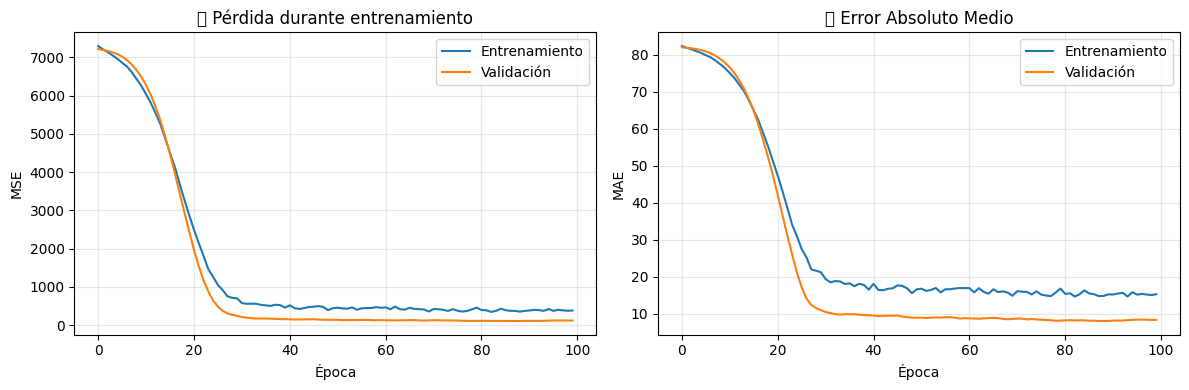

In [13]:
# Callbacks para mejorar entrenamiento
callbacks = [
    keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5, min_lr=1e-6)
]

print("üöÄ Entrenando la red neuronal...")

# Entrenar modelo
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

print("‚úÖ Entrenamiento completado!")

# Visualizar curvas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validaci√≥n')
plt.title('üìâ P√©rdida durante entrenamiento')
plt.xlabel('√âpoca')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validaci√≥n')
plt.title('üìä Error Absoluto Medio')
plt.xlabel('√âpoca')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Secci√≥n 6: Evaluar y Visualizar

üîÆ Evaluando modelo...
üìä RESULTADOS:
üèãÔ∏è Entrenamiento - R¬≤: 0.828, RMSE: $9.30
üß™ Prueba - R¬≤: 0.837, RMSE: $9.42


<ipython-input-14-1428336163>:34: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-1428336163>:34: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


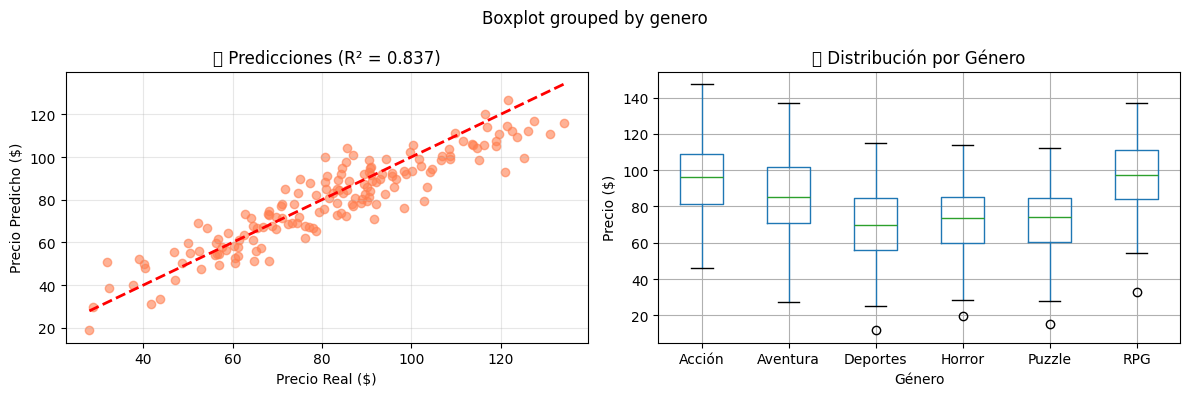


üéÆ Ejemplos de predicciones:
Juego 1: Real=$102.17, Predicho=$95.78, Error=$6.39
Juego 2: Real=$108.77, Predicho=$100.72, Error=$8.05
Juego 3: Real=$83.73, Predicho=$84.38, Error=$0.65
Juego 4: Real=$77.91, Predicho=$66.56, Error=$11.35
Juego 5: Real=$123.63, Predicho=$109.24, Error=$14.39


In [14]:
# Hacer predicciones
print("üîÆ Evaluando modelo...")

y_train_pred = model.predict(X_train_scaled, verbose=0)
y_test_pred = model.predict(X_test_scaled, verbose=0)

# Calcular m√©tricas
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("üìä RESULTADOS:")
print(f"üèãÔ∏è Entrenamiento - R¬≤: {train_r2:.3f}, RMSE: ${train_rmse:.2f}")
print(f"üß™ Prueba - R¬≤: {test_r2:.3f}, RMSE: ${test_rmse:.2f}")

# Visualizar predicciones
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred.flatten(), alpha=0.6, color='coral')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title(f'üéØ Predicciones (R¬≤ = {test_r2:.3f})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
df.boxplot(column='precio', by='genero', ax=plt.gca())
plt.title('üí∞ Distribuci√≥n por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Precio ($)')

plt.tight_layout()
plt.show()

# Mostrar ejemplos
print("\nüéÆ Ejemplos de predicciones:")
indices = np.random.choice(len(X_test), 5, replace=False)
for i, idx in enumerate(indices):
    real = y_test[idx]
    pred = y_test_pred[idx][0]
    print(f"Juego {i+1}: Real=${real:.2f}, Predicho=${pred:.2f}, Error=${abs(real-pred):.2f}")

#Secci√≥n 7: Funci√≥n de Predicci√≥n Interactiva

In [15]:
def predecir_precio_tensorflow(genero, plataforma, a√±o, calificacion, horas):
    """Predice precio usando el modelo de TensorFlow"""

    print("üéÆ PREDICTOR CON TENSORFLOW")
    print("="*35)

    try:
        # Codificar variables
        gen_cod = le_genero.transform([genero])[0]
        plat_cod = le_plataforma.transform([plataforma])[0]

        # Crear entrada
        entrada = np.array([[gen_cod, plat_cod, a√±o, calificacion, horas]], dtype=np.float32)
        entrada_scaled = scaler.transform(entrada)

        # Predecir con TensorFlow
        precio_pred = model.predict(entrada_scaled, verbose=0)[0][0]

        print(f"üìä Caracter√≠sticas:")
        print(f"   ‚Ä¢ G√©nero: {genero}")
        print(f"   ‚Ä¢ Plataforma: {plataforma}")
        print(f"   ‚Ä¢ A√±o: {a√±o}")
        print(f"   ‚Ä¢ Calificaci√≥n: {calificacion}/10")
        print(f"   ‚Ä¢ Horas de juego: {horas}")

        print(f"\nüí∞ Precio predicho: ${precio_pred:.2f}")

        # Categorizar precio
        if precio_pred < 25:
            categoria = "üíö Econ√≥mico"
        elif precio_pred < 50:
            categoria = "üíõ Precio medio"
        else:
            categoria = "üî• Premium"

        print(f"üìà Categor√≠a: {categoria}")

        return precio_pred

    except Exception as e:
        print(f"‚ùå Error: {e}")
        print(f"G√©neros v√°lidos: {list(le_genero.classes_)}")
        print(f"Plataformas v√°lidas: {list(le_plataforma.classes_)}")

# Ejemplos de uso
print("üéØ EJEMPLOS CON TENSORFLOW:")
print("="*30)

predecir_precio_tensorflow('RPG', 'PlayStation', 2023, 9.1, 60)
print()
predecir_precio_tensorflow('Puzzle', 'Mobile', 2022, 7.8, 12)
print()
predecir_precio_tensorflow('Acci√≥n', 'PC', 2023, 8.5, 35)

üéØ EJEMPLOS CON TENSORFLOW:
üéÆ PREDICTOR CON TENSORFLOW
üìä Caracter√≠sticas:
   ‚Ä¢ G√©nero: RPG
   ‚Ä¢ Plataforma: PlayStation
   ‚Ä¢ A√±o: 2023
   ‚Ä¢ Calificaci√≥n: 9.1/10
   ‚Ä¢ Horas de juego: 60

üí∞ Precio predicho: $119.90
üìà Categor√≠a: üî• Premium

üéÆ PREDICTOR CON TENSORFLOW
üìä Caracter√≠sticas:
   ‚Ä¢ G√©nero: Puzzle
   ‚Ä¢ Plataforma: Mobile
   ‚Ä¢ A√±o: 2022
   ‚Ä¢ Calificaci√≥n: 7.8/10
   ‚Ä¢ Horas de juego: 12

üí∞ Precio predicho: $56.96
üìà Categor√≠a: üî• Premium

üéÆ PREDICTOR CON TENSORFLOW
üìä Caracter√≠sticas:
   ‚Ä¢ G√©nero: Acci√≥n
   ‚Ä¢ Plataforma: PC
   ‚Ä¢ A√±o: 2023
   ‚Ä¢ Calificaci√≥n: 8.5/10
   ‚Ä¢ Horas de juego: 35

üí∞ Precio predicho: $110.59
üìà Categor√≠a: üî• Premium


np.float32(110.59442)

# Secci√≥n 8: Conclusiones y Guardado


In [16]:
print("üéì RESUMEN FINAL")
print("="*20)

print(f"ü§ñ Modelo: Red Neuronal con TensorFlow")
print(f"üìä Precisi√≥n: {test_r2:.1%}")
print(f"üí∞ Error promedio: ${test_rmse:.2f}")
print(f"üèóÔ∏è Arquitectura: 64‚Üí32‚Üí16‚Üí1 neuronas")

if test_r2 > 0.8:
    resultado = "üéâ ¬°Excelente modelo!"
elif test_r2 > 0.6:
    resultado = "üëç Buen rendimiento"
else:
    resultado = "‚ö†Ô∏è Necesita mejoras"

print(f"üéØ Evaluaci√≥n: {resultado}")

# Guardar modelo (opcional)
print("\nüíæ Guardando modelo...")
model.save('modelo_precios_videojuegos.h5')
print("‚úÖ Modelo guardado como 'modelo_precios_videojuegos.h5'")

print("\nüöÄ Ventajas de TensorFlow:")
print("‚Ä¢ Mejor control del entrenamiento")
print("‚Ä¢ Callbacks para optimizaci√≥n autom√°tica")
print("‚Ä¢ Normalizaci√≥n por lotes")
print("‚Ä¢ Dropout para evitar sobreajuste")
print("‚Ä¢ F√°cil guardado y carga de modelos")

print("\nüéÆ ¬°Modelo listo para predecir precios!")

üéì RESUMEN FINAL
ü§ñ Modelo: Red Neuronal con TensorFlow
üìä Precisi√≥n: 83.7%
üí∞ Error promedio: $9.42
üèóÔ∏è Arquitectura: 64‚Üí32‚Üí16‚Üí1 neuronas
üéØ Evaluaci√≥n: üéâ ¬°Excelente modelo!

üíæ Guardando modelo...
‚úÖ Modelo guardado como 'modelo_precios_videojuegos.h5'

üöÄ Ventajas de TensorFlow:
‚Ä¢ Mejor control del entrenamiento
‚Ä¢ Callbacks para optimizaci√≥n autom√°tica
‚Ä¢ Normalizaci√≥n por lotes
‚Ä¢ Dropout para evitar sobreajuste
‚Ä¢ F√°cil guardado y carga de modelos

üéÆ ¬°Modelo listo para predecir precios!
